Please fill in your name and that of your teammate.

You: Amine CHARFEDDINE

Teammate: Delil DAG

# Introduction

Welcome to the tenth lab. Neural networks are more a class of tools than a single tool, though the foundation you built last week should enable you to understand what is going on here without too much trouble.

There is relatively little coding this week, which is unfortunate: we are starting to touch topics that require more than a lab's worth of practice to achieve basic proficiency. Rather than overloading you of work, this week we focus a bit more on foundations and give you time to study; then we should hit more interesting and fun applications over the next lectures with Deep Learning and Reinforcement Learning.

### How to pass the lab?

Below you find the exercise questions. Each question awarding points is numbered and states the number of points like this: **[0pt]**. To answer a question, fill the cell below with your answer (markdown for text, code for implementation). Incorrect or incomplete answers are in principle worth 0 points: to assign partial reward is only up to teacher discretion. Over-complete answers do not award extra points (though they are appreciated and will be kept under consideration). Save your work frequently! (`ctrl+s`)

**You need at least 14 points (out of 21 available) to pass** (66%).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
sns.set(rc={'figure.figsize':(8,6)}, style="whitegrid")

# 1. Fundamentals

#### 1.1 **[1pt]** Explain in English what is the distinctive feature of a residual network.

A residual network (also called ResNet) features "skip connections" which bypass one or more layers and directly add the input of a previous layer to a subsequent layer.
This allows inputs to jump over one or more layers and be added directly to a later layer’s output. 
This design helps, amongst others, to prevent the vanishing gradient problem. This problem occurs when the gradient becomes smaller and smaller as it is propagated back through the network during training. In fact, this weakening of the gradient signal can significantly slow down the learning process and make it difficult to train deeper networks effectively (because as we say, the gradient tells us about the direction and the magnitude of the steps to take to decrease the error and if these steps are too small, they will not effectively reduce the error).

#### 1.2 **[2pt]** Write the full equation of a network with structure [2, 4, 1] (same as last week), but this time add (i) biases on all neurons, and (ii) self-recurrent connections only on the hidden layer. How many weights does this network have?

- I would suggest starting from your answer from last week, fixing it based on the solution if you need to and have not already, then add what you need.
- To avoid changing the indices of the weights, you can simply call bias weights $b$ rather than $w$, and recurrent connections $r$.
- The main thing to remember is: each line has the weights entering one destination neuron, and each column refers to one of the inputs to the layer.
- Then for a recurrent network, remember to pass the output of all neurons of the same layer (technically representing the previous-step activations, initialized as `0`s) as inputs to each neuron.

The network has three layers:
- An input layer (no neurons!) with two elements $(x_1, x_2)$
- One hidden layer composed of four neurons $(n_1, n_2, n_3, n_4)$
- The output layer with only one neuron $(n_5)$

We will need to add biases and recurrencies this time: it could be helpful to describe the inputs/outputs for each layer together with the weight matrix. 
- $X$ is the network input, same as before
- Then come the recurrent connections: all the outputs of the neurons of the hidden layer, technically from the previous time step (initialize as zeros)
- Finally the bias input, the constant 1 that will be multiplied by the bias weight
- $X_{hid}$ is the actual full input to the hidden (and first) layer: all three above
- $W_h$ is the weight matrix for ALL the connections entering the hidden layer in the columns, while the rows group the connections entering each neuron
- The output can be written with $n_i$ same as we did last time; the don't forget you will need the bias also for the output layer (but no recursion!)
- You can call $X_{out}$ the input to the output (and second) layer, and $W_{out}$ its weight matrix.
And do not underestimate the value of a quick sketch on a piece of paper! Or head to [draw.io](https://draw.io) if you want a computer drawing that is easy, quick and professional looking.

Remember that the output can be interpreted as one scalar, but is in principle a vector with one element (because having only one output is a special case, normally you need a list of outputs here).

- Input Matrix $X$:
  $$
  X =
  \begin{pmatrix}
  x_1 \\ x_2 \\
  \end{pmatrix}
  $$

- Weight Matrix $W_{in}$ connecting the input layer to the hidden layer (same as last week : 4x2 because two initial inputs and 4 neurons in the next layer):
  $$
  W_{in} =
  \begin{pmatrix}
  w_{11} & w_{12} \\ 
  w_{21} & w_{22} \\ 
  w_{31} & w_{32} \\ 
  w_{41} & w_{42}
  \end{pmatrix}
  $$

- Bias Vector $b_{hid}$ for the hidden layer:
  $$
  b_{hid} =
  \begin{pmatrix}
  b_1 \\ b_2 \\ b_3 \\ b_4 
  \end{pmatrix}
  $$

- Recurrent Weight Matrix $R_{in}$ (a diagonal matrix for self-recurrent connections in the hidden layer):
  $$
  R_{in} =
  \begin{pmatrix}
  r_1 & 0 & 0 & 0\\ 
  0 & r_2 & 0 & 0 \\ 
  0 & 0 & r_3 & 0 \\ 
  0 & 0 & 0 & r_4
  \end{pmatrix}
  $$

- Full Input $X_{hid}$ to the hidden layer (including inputs, recurrent activations, and the bias):
  $$
  X_{hid} = 
  \begin{pmatrix}
  x_1 \\
  x_2 \\
  r_1 \\
  r_2 \\
  r_3 \\
  r_4 \\
  1 
  \end{pmatrix}
  $$

- Weight Matrix $W_{hid}$ connecting the hidden layer to the output layer:
  $$
  W_{hid} =
  \begin{pmatrix}
  w_{51} & w_{52} & w_{53} & w_{54}
  \end{pmatrix}
  $$

- $W_{\text{h}}$: The weight matrix for all connections entering the hidden layer.  It includes : weights from $x_1, x_2$ to each neuron, recurrent weights from $r_1, r_2, r_3, r_4$ to each neuron, and a bias weight.

$$ W_{\text{h}} = \begin{pmatrix}
w_{11} & w_{12} & r_{1} & 0 & 0 & 0 & b_1 \\
w_{21} & w_{22} & 0 & r_{2} & 0 & 0 & b_2 \\
w_{31} & w_{32} & 0 & 0 & r_{3} & 0 & b_3 \\
w_{41} & w_{42} & 0 & 0 & 0 & r_{4} & b_4
\end{pmatrix} $$

- For time step $t$:
$$ \mathbf{h}_t = \sigma(W_{\text{h}} \cdot X_{\text{hid}}) $$
Where $\sigma$ is the activation function (sigmoid).

- We have: $X_{\text{out}} = (\mathbf{h}_t, 1)$.

- $W_{\text{out}}$: This is a 1x5 matrix for the single output neuron $n_5$, including weights from each hidden neuron and a bias.

$$ W_{\text{out}} = \begin{bmatrix}
w_{51} & w_{52} & w_{53} & w_{54} & b_5
\end{bmatrix} $$

$$ y_t = \sigma(W_{\text{out}} \cdot X_{\text{out}}) $$

Input to hidden layer: there are 4 neurons each with 2 weights, so 4 x 2 = 8 weights. <br>
Biases in hidden layer: 4 biases. <br>
Recurrent weights in hidden layer: 4 weights. <br>
Hidden to output layer: there is 1 neuron connected to 4 neurons in the hidden layer, thus 1 x 4 = 4 weights. <br>
Bias for output layer : 1 weight. <br>
Total number of weights: 8+4+4+4+1 = 21 weights.

**Important Remark** : Here I modeled the self-reccurent connections as a diagonal matrix where each neuron connects only to itself. However, we also could have modeled it as a full matrix with potential connections between all neurons and then the matrix $R_{in} $ would have weights for in every index so that would change the total results to : $8+4+16+4+1=33$ weights. I asked which one should be used in the forum section of the course but unfortunately did not get any response.

#### 1.3 **[2pt]** A neural network has only one layer of two convolutional neurons with identity activation. Below you will find respective kernels $W_1$ and $W_2$ and input $X$. Activate the network on the input by hand showing all calculation. Assume no padding and state explicitly the expected output size.

It's easier to understand what you need to explain about your calculations if you actually start doing them :) just mark what you actually input in the calculator, what the calculator returns, and what calculation you are confident skipping.

$$
W_1 = 
\begin{pmatrix}
-1 & -1 & -1 \\
 2 &  2 &  2 \\
-1 & -1 & -1
\end{pmatrix}
\quad,\quad
W_2 = 
\begin{pmatrix}
-1 & 2 & -1 \\
-1 & 2 & -1 \\
-1 & 2 & -1
\end{pmatrix}
\\
X = 
\begin{pmatrix}
2 & 2 & 2 & 2 & 2 \\
3 & 3 & 3 & 3 & 3 \\
1 & 1 & 1 & 1 & 1 \\
3 & 3 & 3 & 3 & 3 \\
2 & 2 & 2 & 2 & 2 
\end{pmatrix}
$$

The expected output size for each convolution is 3x3.

Convolution Operation with $W_1$

- Top-left corner (1,1): $(-1*2 + -1*2 + -1*2 + 2*3 + 2*3 + 2*3 + -1*1 + -1*1 + -1*1) = 9$
- Top-middle (1,2): Repeating the operation across the entire row gives the same result due to uniformity.
- Top-right (1,3): Same reasoning.
- Middle-left (2,1): $(-1*3 + -1*3 + -1*3 + 2*1 + 2*1 + 2*1 + -1*3 + -1*3 + -1*3) = -12$
- Middle (2,2): 12 (see above)
- Middle-right (2,3): 12 (same)
- Bottom-left (3,1): $(-1*1 + -1*1 + -1*1 + 2*3 + 2*3 + 2*3 + -1*2 + -1*2 + -1*2) = 9$
- Bottom-middle (3,2): 9 (see above)
- Bottom-right (3,3): 9 (same)

Output Matrix for $W_1$
$$
W_1 = 
\begin{pmatrix}
 9 & 9 & 9 \\
 -12 &  -12 &  -12 \\
 9 & 9 & 9
\end{pmatrix}
$$

Calculations for $W_2$

- Top-left corner (1,1): $(-1*2 + 2*2 + -1*2 + -1*3 + 2*3 + -1*3 + -1*1 + 2*1 + -1*1) = 0$
- Top-middle (1,2) and top-right (1,3): Repeating the operation across the entire row gives the same result due to uniformity.
- Middle-left (2,1): $(-1*3 + 2*3 + -1*3 + -1*1 + 2*1 + -1*1 + -1*3 + 2*3 + -1*3) = 0$
- Middle (2,2), middle-right (2,3): 12 (same idea)
- Bottom-left (3,1): $(-1*3 + 2*1 + -1*1 + -1*3 + 2*3 + -1*3 + -1*2 + 2*2 + -1*2) = 0$
- Bottom-middle (3,2), bottom-right (3,3): 6 (same idea)

Output Matrix for $W_2$
$$
W_2 = 
\begin{pmatrix}
 0 & 0 & 0 \\
 0 &  0 &  0 \\
 0 & 0 & 0
\end{pmatrix}
$$


#### 1.4 **[2pt]** Look at the activations of the two neurons from 1.3 and discuss why they are so different. Explain in particular the regularities both in the inputs and in the kernels. Then go one step further and explain, to the best of your understanding, which types of features are detected by the two kernels.

- This is another open question: as long as you do not write anything wrong, while showing competence and intuition, you will get the points.
- Hint: focus on thinking about the _patterns_ that you can see by eye both in the data matrix and in the kernels. Try to go for an intuitive answer.

I believe $W_1$ responds to horizontal transitions due to its positive middle row and negative weights in the first and last rows. This is suitable for the output $X$ since it also has uniform rows. That is why, I think, the activation linked with $W_1$ gave us a matrix with different values. Similarly, I think $W_2$ is designed for vertical variations with a similar vertical structure (now it's the middle column which has positive weights and the first and last column with negative weights). It remains inactive when activated through X because X does not have any vertical changes (it's the same column 5 times). That is why the activation matrix is null in this second case.

To sum up, I believe $W_1$ captures horizontal features, while $W_2$, aimed at vertical ones, finds no targets in $X$. That explains the difference in the activations matrices of the two neurons.

#### 1.5 **[1pt]** Activate a $3x3$ max pooling layer on the outputs of the two convolutions from your answer to question 1.3. Assume no padding.

Given that our output matrices are 3x3 and the pooling kernel size is also 3x3, the max pooling will cover the entire matrix at once. Therefore, we take the maximum value from the whole matrix for each kernel's output.

1. Max Pooling on $W_1$'s Output:
   - The maximum value in the matrix is 9, so the pooled result is: 9

2. Max Pooling on $W_2$'s Output:
   - The maximum value in this matrix is 0, so the pooled result is: 0


#### 1.6 **[1pt]** Explain in one sentence what is an autoencoder. Why do autoencoders have an hourglass shape? Could you design an autoencoder with a different shape?

An autoencoder is a type of neural network that learns to compress unlabeled data into a smaller, essential representation and then reconstructs it, often to reduce dimensionality or extract features while ignoring noise.

Autoencoders have an hourglass shape because they first compress the data into a smaller form (encode) and then expand it back to match the original input (decode), leading to a natural narrowing and then widening in the network design.

Yes, it's possible to design an autoencoder with a different shape, like a variational autoencoder (VAE) or one with skip connections, but the basic idea of compressing and then reconstructing data generally means there will be some form of narrowing and widening in the design.

# 2. Recurrent Neural Networks

#### 2.1 **[3pt]** Below is last week's implementation of a neural network augmented into a fully-connected RNN with bias connections. Fix it by writing the missing code as marked by `?`.

- Unless otherwise stated, a RNN has fully-connected self-recurrent connections on each layer.
- You should know exactly which connections to add if you answered the RNN question in the fundamentals.
- For the bias: remember that you need all elements in `state` to be longer by one element: put actual `1`s in these last positions at initialization, then never touch them again.
- Recurrencies: you need to make space in the input to each layer for its own output. I typically sort them as [input, recurrencies, bias], but order is not important: consistency is. Make sure all your sizes are correct.
- When calculating the size of an input now you need to use `struct` twice: once for the size of the layer entering (something like `struct[nlay]`) and once for the size of the output that goes back as input in the recursion (hence `struct[nlay+1]`). HINT: to make the pairs for each layer execute and understand the following: `zip(struct, struct[1:])`
- When you activate a layer remember to copy the activation to both (i) its output and (ii) its input, at the correct indices.
- It's easier to compute the size of each input beforehand, then use it to make the `state` list. Then for each weight matrix you can take the number of rows from the structure (as before), and the number of inputs from the `state` sizes.  Don't worry about duplicating the activation in the layer's input, it's actually faster because you have a ready numpy array rather than composing at activation.
- Remember to initialize the recurrent output to `0`. Simplest way is to initialize `state` using `np.zeros()` instead of `np.empty()`. Then set the last value of each `state` element to `1` for the bias.
- I used myself `import IPython; IPython.embed()` heavily to get this to work. You can also call (once!) `%pdb` to drop in the debugger on error. Keep calm and check the dimensions.
- The layer activation function should change because you are saving the activation to two locations (and at specific indices, not direct substitution like before), but the network activation function should change just marginally (add indices to insert input in state)
- To _convolve_ with stride 1 and no padding a window of size two on a 1D list (take a pair at a time, advance by one) in Python you can use `zip(lst, lst[1:])`.
- This question only refers to neural networks, not learning algorithm, so leave backpropagation out and do not worry about unrolling the network.
- Again activate it on a simple input to verify everything is works. The input should be exactly the same as last week's (as the network architecture).
- Think: how many weights do you expect to have? Remember that you have 3 matrices (for the 3 layers of neurons), in each the number of rows is unchanged (because you have one per each neuron) but the inputs now are not only connections from the previous layer, you also have recursion (take the output of this layer as its own input) and bias (constant 1 appended to the inputs).
<!-- Secret hint: my tally is (4+3+1)*3 + (3+4+1)*4 + (4+3+1)*3 -->

In [2]:
class RecurrentNeuralNetwork:
    def __init__(self, struct):
        # These are basic, copy+paste from FFNN
        self.struct = struct
        self.nlayers = len(self.struct) #like lab 9
        self.nins, *self.nhids, self.nouts = self.struct
        self.sigma = lambda x: 1/(1+np.exp(-x)) #still using the sigmoid function
        
        # Each `state` is an input for next layer: it now includes rec and bias
        state_sizes = [inp + rec + 1 for inp, rec in zip(self.struct, self.struct[1:])] # inputs + recurrent +1 for the bias
        # Notice the `zip` above ends when the second list reaches the end (1 shorter)
        # Last `state` is only the output of the last layer (no rec/b)
        state_sizes += [self.struct[-1]] 
        #this is for the last case (there is no rec since no subsequent layer and we don't consider the bias here) so only "inp" to be added
        # We can now build the state of the network
        self.state = [np.empty(size, dtype='float64') for size in state_sizes] #same format as last week 
        # we could also have done : self.state = [np.zeros(size) for size in state_sizes]
        
        # We will need to access inputs and recurrencies by index: the following helps
        self.inp_idxs = [range(0, inp_size) for inp_size in self.struct] 
        #indices for each layer's direct inputs
        
        self.rec_idxs = [range(inp_size, inp_size+rec_size) for inp_size, rec_size in zip(struct[:-1], struct[1:])] 
        #indices for each layer's recurrent inputs (except the first which does not have any)
        #doing a drawing helps (for example, for the first layer we have inp+rec+1 = 10 and the indices are : 1 to 4 for inputs, 5 to 9 for rec, and 10 for the bias)
        
        # Finally, fix the bias input in the last position of all input `state`s
        # Just set and forget, and no need for indices because we won't access it again
        for s in self.state: s[-1] = 1 #bias is last element, and equals 1
            
        # The `state` sizes now correspond to the row lengths (ncols) for the weight matrices
        self.wsizes = [[out_size, inp_size] for (out_size, inp_size) in zip(self.struct[1:], state_sizes)] 
        # like last week, the number of rows is equal to the number of neurons in the corresponding subsequent layer 
        # and the number of columns is the number of inputs it gets (so the initial inputs + the recurrents + the bias)
        
        # Finally: weight initialization. Bad practice to hardcode this, but ok here
        self.weights = [np.random.normal(size=ws) for ws in self.wsizes]

    # The layer activation is unchanged: sigma(W.dot(X)) -- only W and X (=state) differ
    def act_layer(self, nlay):
        return self.sigma(np.dot(self.weights[nlay], self.state[nlay])) #same as last week

    # The network activation only writes the act twice this time: output & rec-input
    def act_net(self, inp):
        assert len(inp) == self.nins, f"got input `{inp}`, expected np.array of length `{self.nins}`"
        self.state[0][self.inp_idxs[0]] = inp
        for nlay in range(self.nlayers-1):
            act = self.act_layer(nlay)
            # This time the layer activation goes in two places:
            # - In the input indices of the output of this layer / input to next
            self.state[nlay + 1][self.inp_idxs[nlay + 1]] = act #same idea as last week (we activate so we modify the value for the next layer)
            # - In the recurrent indices of the input to this layer
            self.state[nlay][self.rec_idxs[nlay]] = act #but now we also have the "recurrent" update (regarding the current layer)
        return self.state[-1]

In [3]:
struct = [4,5,4,3]
inputs = [3,2,4,3]
net = RecurrentNeuralNetwork(struct)
# We expect the activation to change this time upon multiple calls on the same input
# This is because the `state` of the RNN is maintained in the recurrent connections
print("activation 1:", net.act_net(np.array(inputs)))
print("activation 2:", net.act_net(np.array(inputs)))
print("activation 3:", net.act_net(np.array(inputs)))

activation 1: [0.18792549 0.02280627 0.81163708]
activation 2: [0.06662516 0.0363085  0.80979929]
activation 3: [0.06781555 0.03728342 0.7667572 ]


# 3. Convolutional Networks

#### 1.1 **[2pt]** Write a Python function for 2D convolution, then run it on a randomly generated input matrix and show the output.

- You need to write a function that takes a 2D input and a function to convolve as parameters, then convolves the function over the inputs to produce the output.
- The window size is not specified: you can use a 3x3 to keep it simple since you saw that in the examples.
- The function to convolve is not specified: no need for it to be a neural network, something as simple as `sum` or a quick lambda calling the numpy `x.sum()` would work perfectly well. Remember that the important part is that it should take a high-dimensional (3x3?) input and output only one value.
- The size of the input matrix is not specified: with a 3x3 mask we could go as small as 5x5 with no padding and that would still show that the convolution works.
- Then remember: the neural networks are just other functions than `sum`, but behave exactly the same way. Convolving a neural network only allows you to learn the function rather than hardcoding it, but the convolution process is independent.
- Answer the question until the end: show that you know how to create a matrix of random numbers, and of the right size.

In [4]:
def convolution(m,f):
    input_rows, input_cols = m.shape # we gather the dimensions of the input matrix
    
    kernel_size = 3 # to keep it simple
    
    output_rows = input_rows - kernel_size + 1 # we determine the sizes of the output matrix 
    output_cols = input_cols - kernel_size + 1
    
    output_matrix = np.empty((output_rows, output_cols)) # initialization
    
    for i in range(output_rows): # actual convolution operation
        for j in range(output_cols):
            submatrix = m[i:i+kernel_size, j:j+kernel_size] # we extract the submatrix
            output_matrix[i, j] = f(submatrix) #we apply the function to the submatrix
    
    return output_matrix

m = np.random.randn(3, 3) # we create a 3x3 matrix with random numbers
n = np.random.randn(5, 5)  # same but 5x5 example
f = lambda x: x.sum()
print(convolution(m,f))
print(convolution(n,f))


[[0.83406416]]
[[-4.276742   -3.23070573  0.78219796]
 [-0.29740852 -2.5885803  -2.01003702]
 [-0.75404552 -0.88448939 -3.03726577]]


# 4. Handwritten digit recognition with Keras

As mentioned at the beginning, we need to cross a gap in exercise complexity. On one hand you are ready to understand the inner work of a DL library like Keras, on the other asking you for such a task on top of today's lecture is too much even for this course :) So let's leave the creative part for next weeks, where we will see some more advanced applications anyway, and focus today on what we learned and on a new skill: how to justify your code.

Below is a tutorial from the Keras website on convolutional networks [[source]](https://keras.io/examples/vision/mnist_convnet/). It uses the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database), a standard dataset for handwritten character recognition. Keras offers you a backend to automatically download the dataset, similarly to what we did so far with Seaborn and Iris.

The code should work as is (did you `pipenv install tensorflow keras`?), but take a while to run. Read it line by line, really study and understand it, feel free to change it so that it runs in few seconds if you wish to play with it; then answer the questions below.

NOTE: you don't need to run the code to answer any of the questions below. If you used PyTorch at the last lecture, this is your chance to try out Keras. If you cannot (looking at you M1 users), you can use Colab for this assignment, or replace the Keras tutorial with a PyTorch equivalent [such as this](https://pythonguides.com/pytorch-mnist/). This only affects 4.3, while 4.1 and 4.2 should be fine.

In [5]:
"""
Title: Simple MNIST convnet
Author: [fchollet](https://twitter.com/fchollet)
Date created: 2015/06/19
Last modified: 2020/04/21
Description: A simple convnet that achieves ~99% test accuracy on MNIST.
SOURCE: https://github.com/keras-team/keras-io/blob/master/examples/vision/mnist_convnet.py
"""

"""
## Setup
"""

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

"""
## Prepare the data
"""

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

"""
## Build the model
"""

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

"""
## Train the model
"""

batch_size = 128
epochs = 15

model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"])

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1)

"""
## Evaluate the trained model
"""
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                 

#### 4.1 **[1pt]** Data plotting: plot the first 9 images in MNIST using a 6x6 subplot.

Let's first see what the MNIST looks like. I showed how to use subplots in a recent solution -- do you remember where it was? You'll need the ability to search quickly for what you need to complete the exam in time. Try timing how long it takes you to answer this question (no seriously challenge your teammate on who solves this the quickest and feel free to brag about it in your solution below).
- Add the label on the title to see how the numbers are represented: do you see the connection to last week's `species`?
- After you obtain the axis from `plt.subplots()`, you can print a 2D image using `ax[?,?].imshow()`

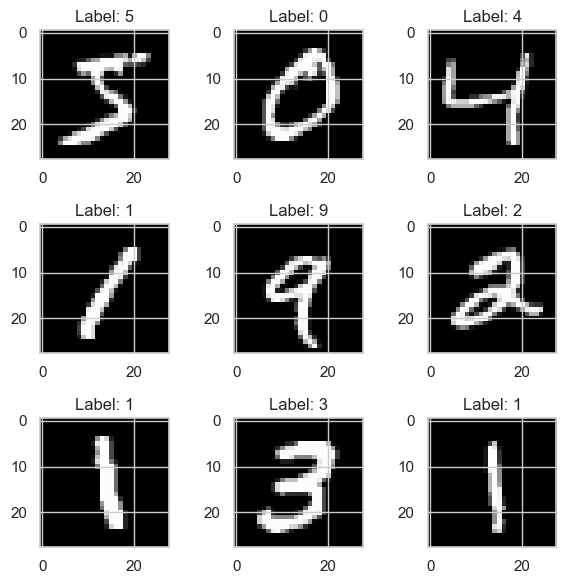

In [10]:
# Since we have 9 images, a 6x6 size grid would give us 36 pictures so I assume here we talk about the size of each figure to be 6x6 inches
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(6, 6))  # we create a 3x3 grid of subplots within a 6x6 inch figure 
axes = axes.flatten() 

for i, ax in enumerate(axes):
    img = x_train[i]  #  we extract the i-th image
    label = np.argmax(y_train[i])  # we get the label (without argmax we get a list of 0 and one 1 (the correct prediction))
    ax.imshow(img, cmap='gray')  # we plot the image in grayscale 
    ax.set_title(f"Label: {label}") 

plt.tight_layout()  # we djust the layout to prevent overlapping
plt.show()

#### 4.2 **[4pt]** Explain the following lines in the Keras MNIST Tutorial code (in English): 27, 48, 51, 52, 57, 67/77, 68/78, 71

- To answer this question you need to show complete competence, as if you wrote this code yourself and you were asked to explain your choices at an oral exam.
- For each of the lines mentioned, check the code provided and explain it thoroughly
- For each variable, explain its meaning, its use, and the choice of value assigned
- For each function call, explain what it does, the meaning of all parameters, and the choices of all values.
- Reading the code like "assign 12 to variable `epochs`" will not constitute an acceptable answer.
- Reading the code like "creates a new Sequential" is also not acceptable: check the documentation for `Sequential`, understand what the call does, and present your findings.

- Line 27 : (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() <br>
This line loads the MNIST dataset, which includes images of handwritten digits and their corresponding labels. The dataset is split into training images (x_train) and labels (y_train), and testing images (x_test) and labels (y_test). The call keras.datasets.mnist.load_data() is used to fetch this standard dataset from Keras' repository, offering a common benchmark for machine learning models in image classification.

- Line 48 : model = keras.Sequential( <br>
This line begins the definition of a sequential model in Keras. A sequential model is a linear stack of layers where each layer has exactly one input tensor and one output tensor. The Sequential model is ideal for building straightforward neural networks where data flows from one layer to the next without branching or skip connections, making it perfect for standard architectures.

- Line 51: layers.Conv2D(32, kernel_size=(3, 3), activation="relu") <br>
Here, this adds a 2D convolutional layer with 32 filters of size 3x3 to the model, using the ReLU activation function. In other words, this layers looks for patterns in images using 32 small 3x3 filters. It uses the relu function to help the model understand non-linear patterns.

- Line 52: layers.MaxPooling2D(pool_size=(2, 2)) <br>
This incorporates a max pooling layer with a 2x2 pool size that reduces the spatial dimensions of the input feature map. This operation retains the most dominant features in each 2x2 area. This helps the model focus on the most important parts of the image. (it's similar to what we did in question 1.5) It also makes the network more robust to small variations in the image and helps to prevent overfitting.

- Line 57: layers.Dense(num_classes, activation="softmax"), <br>
This adds a fully connected (dense) layer to the model that links every input to every output, to predict which of the 10 digit classes (0-9) the image most likely represents. The softmax function turns the decisions into a probability distribution.

- Lines 67/77: batch_size = 128 <br>
This sets the number of images the model processes together during one step of training (before the model is updated) to 128. By doing this, the model updates its weights after looking at each group of 128 images. It allows for faster convergence without requiring too much memory.

- Lines 68/78: epochs = 15 <br>
This specifies that the model will go through the entire set of training images 15 times. Each pass over the training data helps the model learn more from the images and improve its ability to recognize digits. This number allows to optimize performance without significant overfitting risks (which become greater if we increase the number of epochs).

- Line 71: loss="categorical_crossentropy" <br>
This line sets the loss function to "categorical_crossentropy". This function measures how well the model's predictions match the actual labels. Tt measures the difference between the predicted probabilities (from the soft max function, see line 57) and the actual labels in one-hot encoded form. This loss function is suited to multi-classification problems like this one. The model will try to minimize this loss during training to improve its accuracy. 

#### 4.3 **[2pt]** Run Keras MNIST code, tweaking it as needed if it takes too long on your machine. Plot the model's accuracy and loss over time.

- This is almost for free since you did the same visualization last week, but you need to get the code to run first.
- Also you may want to make sure your changes include setting 'accuracy' and the `history` variable, or at the end of the run you could end up with still nothing to show :)

In [27]:
"""
Title: Simple MNIST convnet
Author: [fchollet](https://twitter.com/fchollet)
Date created: 2015/06/19
Last modified: 2020/04/21
Description: A simple convnet that achieves ~99% test accuracy on MNIST.
SOURCE: https://github.com/keras-team/keras-io/blob/master/examples/vision/mnist_convnet.py
"""

"""
## Setup
"""

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

"""
## Prepare the data
"""

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

"""
## Build the model
"""

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu"), # decrease from 32 to 16
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"), # decrease from 64 to 32
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

"""
## Train the model
"""

batch_size = 256 # increased it from 128 to 256 (less updates so quicker)
epochs = 10 # reduced it from 15 to 10 (we go over the entire set of training images 5 times less)

model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"])

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1)

"""
## Evaluate the trained model
"""
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        9280      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                               

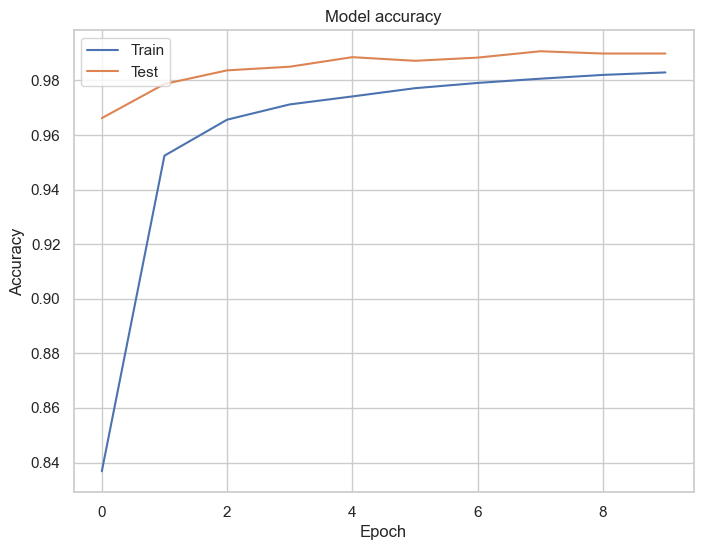

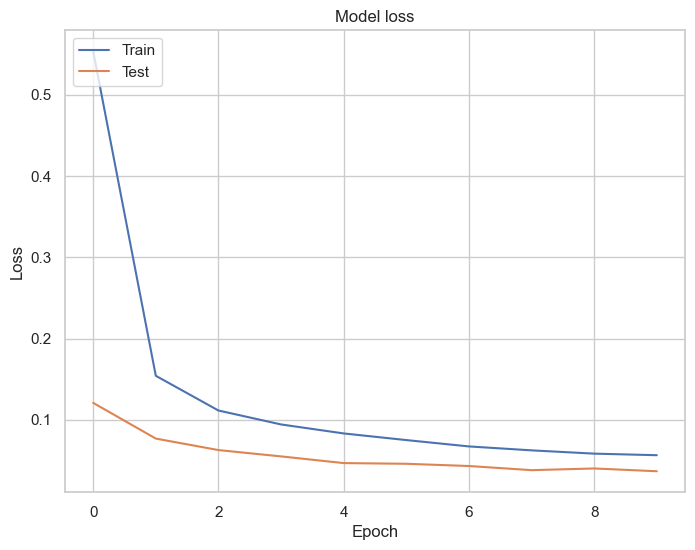

In [28]:
plt.plot(history.history['accuracy']) #we plot the accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss']) #we plot the loss
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# At the end of the exercise

Bonus question with no points! Answering this will have no influence on your scoring, not at the assignment and not towards the exam score -- really feel free to ignore it with no consequence. But solving it will reward you with skills that will make the next lectures easier, give you real applications, and will be good practice towards the exam.

The solution for this questions will not be included in the regular lab solutions pdf, but you are welcome to open a discussion on the Moodle: we will support your addressing it, and you may meet other students that choose to solve this, and find a teammate for the next assignment that is willing to do things for fun and not only for score :)

#### BONUS **[ZERO pt]** Edit the Keras MNIST code to use a simple RNN, then cheat by passing all images of a class in a sequence (careful with batch size). Reset the network between classes. RNNs will recognize that you expect a constant output per each sequence, decide which output with the first few images, then just saturate the right neurons using the recurrent connections to generate a constant output regardless of the input. You can verify this by then testing the network on a sequence of elements from a constant class, followed by one (or more) elements from another class: they will likely be misclassified. All intelligent learning picks up on shortcuts whenever available, here is a famous example (check the full paper): [husky vs. wolf](https://www.researchgate.net/figure/A-husky-on-the-left-is-confused-with-a-wolf-because-the-pixels-on-the-right_fig1_329277474). Notice that getting a "simple" RNN in Keras is not straightforward.

### Final considerations

- At the end of this lecture + exercise you should _own_ neural networks. It does not mean that you know everything about them, but you know enough to understand any resource on the topic, and actually understand how these things work better than most people who just use Keras/Pytorch on a daily basis (unfortunately).